<h1>Dataset Regresión Logística – Heart Disease Cleveland UCI:</h1>
<p><strong>Autor:</strong> Nicolas Linares</p>

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
datosCvs= pd.read_csv('./heart_cleveland_upload.csv')

In [54]:
datosCvs.head(25)

,edad,sexo,dolor_toracico_tipico,presion_arterial_sistolica_reposo,colesterol,glucemia_ayunas,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_pecho_inducida_ejercicio,depresion_maxima_segmento_ST,pendiente_segmento_ST,numero_vasos_principales_enfermedad_significativa,resultado_prueba_perfusion_talio,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [7]:
# Edad: Normalmente varía según la población, pero típicamente se considera de 1 a 100 años en adultos.
# Sexo: Variable categórica.
# Dolor torácico típico: Variable categórica.
# Presión arterial sistólica en reposo: Normalmente alrededor de 120 a 180(Peligrosamente alta)
# Colesterol: Los niveles normales de colesterol total en sangre son generalmente de 40 mg/dL a 240 mg/dl o más(Peligrosamente alta)
# Glucemia en ayunas: Variable categórica.
# Electrocardiograma en reposo: Variable categórica.
# Frecuencia cardíaca máxima: La frecuencia cardíaca máxima se estima comúnmente restando la edad del individuo de 220.
# Angina de pecho inducida por ejercicio: Variable categórica.
# Depresión máxima del segmento ST: Variable numérica, puede variar según el contexto clínico.
# Pendiente del segmento ST: Variable categórica.
# Número de vasos principales con enfermedad significativa: Variable numérica, generalmente de 0 a 3.
# Resultado de la prueba de perfusión de talio: Variable categórica.
# Condición: Variable categórica.

In [55]:
datosCvs.describe()

,edad,sexo,dolor_toracico_tipico,presion_arterial_sistolica_reposo,colesterol,glucemia_ayunas,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_pecho_inducida_ejercicio,depresion_maxima_segmento_ST,pendiente_segmento_ST,numero_vasos_principales_enfermedad_significativa,resultado_prueba_perfusion_talio,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


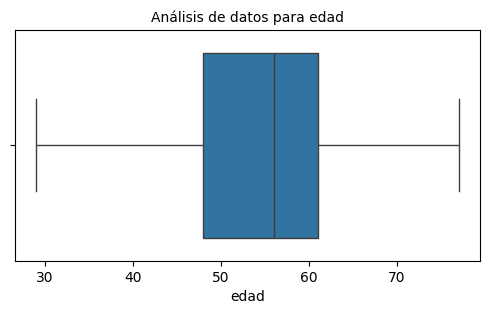

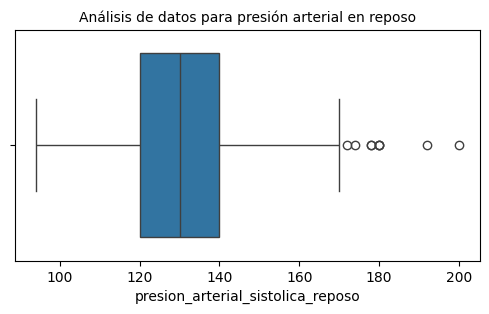

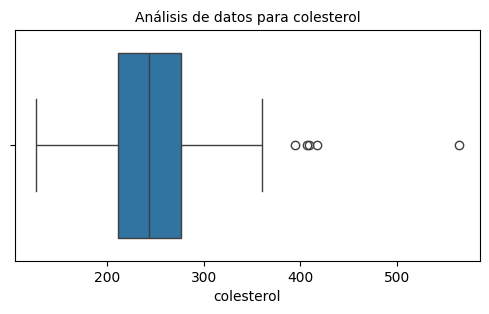

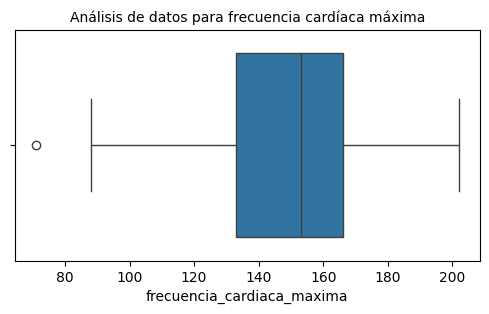

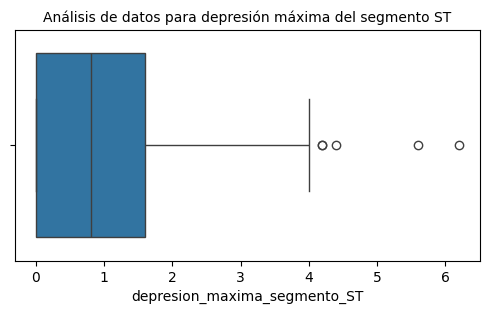

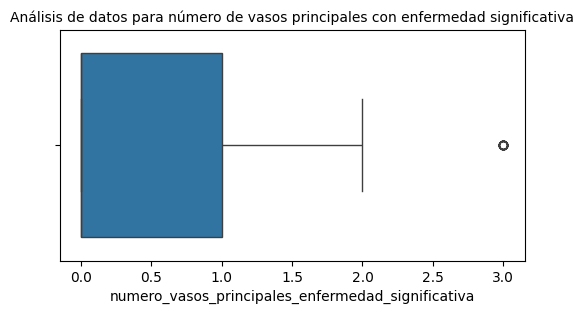

In [56]:
# Edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['edad'])
plt.title('Análisis de datos para edad', fontsize=10)
plt.show()

# Sexo (variable categórica)

# Dolor torácico típico (variable categórica)

# Presión arterial sistólica en reposo
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['presion_arterial_sistolica_reposo'])
plt.title('Análisis de datos para presión arterial en reposo', fontsize=10)
plt.show()

# Colesterol
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['colesterol'])
plt.title('Análisis de datos para colesterol', fontsize=10)
plt.show()

# Glucemia en ayunas (variable categórica)

# Electrocardiograma en reposo (variable categórica)

# Frecuencia cardíaca máxima
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['frecuencia_cardiaca_maxima'])
plt.title('Análisis de datos para frecuencia cardíaca máxima', fontsize=10)
plt.show()

# Angina de pecho inducida por ejercicio (variable categórica)

# Depresión máxima del segmento ST
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['depresion_maxima_segmento_ST'])
plt.title('Análisis de datos para depresión máxima del segmento ST', fontsize=10)
plt.show()

# Pendiente del segmento ST (variable categórica)

# Número de vasos principales con enfermedad significativa
plt.figure(figsize=(6, 3))
sns.boxplot(x=datosCvs['numero_vasos_principales_enfermedad_significativa'])
plt.title('Análisis de datos para número de vasos principales con enfermedad significativa', fontsize=10)
plt.show()

# Resultado de la prueba de perfusión de talio (variable categórica)

# Condición (variable categórica)

In [117]:
# Edad (variable numérica)
print("Cantidad de registros con 0 en Edad:", datosCvs['edad'].isin([0]).sum())

# Sexo (variable categórica)

# Dolor torácico típico (variable categórica)

# Presión arterial sistólica en reposo
print("Cantidad de registros con 0 en Presión arterial en reposo:", datosCvs['presion_arterial_sistolica_reposo'].isin([0]).sum())

# Colesterol
print("Cantidad de registros con 0 en Colesterol:", datosCvs['colesterol'].isin([0]).sum())

# Glucemia en ayunas (variable categórica) 

# Electrocardiograma en reposo (variable categórica)

# Frecuencia cardíaca máxima
print("Cantidad de registros con 0 en Frecuencia cardíaca máxima:", datosCvs['frecuencia_cardiaca_maxima'].isin([0]).sum())

# Angina de pecho inducida por ejercicio (variable categórica)

# Depresión máxima del segmento ST
print("Cantidad de registros con 0 en Depresión máxima del segmento ST:", datosCvs['depresion_maxima_segmento_ST'].isin([0]).sum())

# Pendiente del segmento ST (variable categórica)

# Número de vasos principales con enfermedad significativa (variable categórica)

# Resultado de la prueba de perfusión de talio (variable categórica)

# Condición (variable categórica)


Cantidad de registros con 0 en Edad: 0
Cantidad de registros con 0 en Presión arterial en reposo: 0
Cantidad de registros con 0 en Colesterol: 0
Cantidad de registros con 0 en Frecuencia cardíaca máxima: 0
Cantidad de registros con 0 en Depresión máxima del segmento ST: 0


In [58]:
# Edad
edadMax = 90
edadMin = 5
atipicosEdad = ((datosCvs['edad'] < edadMin) | (datosCvs['edad'] > edadMax)).sum()
print("El total de edades atípicas es {}".format(atipicosEdad))

# Sexo (variable categórica)
# En este caso, no podemos considerar valores atípicos para la variable categórica 'sexo'.

# Dolor torácico típico (variable categórica)
# Tampoco consideraremos valores atípicos para esta variable categórica.

# Presión arterial sistólica en reposo
presionMax = 180  # A modo de ejemplo, puedes ajustar estos valores según los límites clínicos.
presionMin = 120
atipicosPresion = ((datosCvs['presion_arterial_sistolica_reposo'] < presionMin) | (datosCvs['presion_arterial_sistolica_reposo'] > presionMax)).sum()
print("El total de valores atípicos en presión arterial sistólica en reposo es {}".format(atipicosPresion))

# Colesterol
colesterolMax = 240  # A modo de ejemplo, puedes ajustar estos valores según los límites clínicos.
colesterolMin = 40
atipicosColesterol = ((datosCvs['colesterol'] < colesterolMin) | (datosCvs['colesterol'] > colesterolMax)).sum()
print("El total de valores atípicos en colesterol es {}".format(atipicosColesterol))

# Glucemia en ayunas (variable categórica)

# Electrocardiograma en reposo (variable categórica)

# Frecuencia cardíaca máxima

# Angina de pecho inducida por ejercicio (variable categórica)

# No podemos considerar valores atípicos para esta variable categórica.

# Depresión máxima del segmento ST

# A modo de ejemplo, puedes ajustar estos valores según los límites clínicos.
depresionMax = 5
depresionMin = 0
atipicosDepresion = ((datosCvs['depresion_maxima_segmento_ST'] < depresionMin) | (datosCvs['depresion_maxima_segmento_ST'] > depresionMax)).sum()
print("El total de valores atípicos en depresión máxima del segmento ST es {}".format(atipicosDepresion))

# Pendiente del segmento ST (variable categórica)
# No podemos considerar valores atípicos para esta variable categórica.

# Número de vasos principales con enfermedad significativa
# A modo de ejemplo, puedes ajustar estos valores según los límites clínicos.
vasosMax = 3
vasosMin = 0
atipicosVasos = ((datosCvs['numero_vasos_principales_enfermedad_significativa'] < vasosMin) | (datosCvs['numero_vasos_principales_enfermedad_significativa'] > vasosMax)).sum()
print("El total de valores atípicos en número de vasos principales con enfermedad significativa es {}".format(atipicosVasos))

# Resultado de la prueba de perfusión de talio (variable categórica)
# No podemos considerar valores atípicos para esta variable categórica.

# Condición (variable categórica)


El total de edades atípicas es 0
El total de valores atípicos en presión arterial sistólica en reposo es 62
El total de valores atípicos en colesterol es 151
El total de valores atípicos en depresión máxima del segmento ST es 2
El total de valores atípicos en número de vasos principales con enfermedad significativa es 0


In [62]:
datosCvs = datosCvs[(datosCvs['presion_arterial_sistolica_reposo'] < presionMax) & (datosCvs['presion_arterial_sistolica_reposo'] > presionMin)]
datosCvs = datosCvs[(datosCvs['colesterol'] < colesterolMax) & (datosCvs['colesterol'] > colesterolMin)]
datosCvs = datosCvs[(datosCvs['depresion_maxima_segmento_ST'] < depresionMax) & (datosCvs['depresion_maxima_segmento_ST'] > depresionMin)]

In [63]:
datosCvs.head(25)

,edad,sexo,dolor_toracico_tipico,presion_arterial_sistolica_reposo,colesterol,glucemia_ayunas,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_pecho_inducida_ejercicio,depresion_maxima_segmento_ST,pendiente_segmento_ST,numero_vasos_principales_enfermedad_significativa,resultado_prueba_perfusion_talio,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
12,59,1,0,134,204,0,0,162,0,0.8,0,2,0,1
17,51,1,0,125,213,0,2,125,1,1.4,0,1,0,0
20,40,1,0,140,199,0,0,178,1,1.4,0,0,2,0
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0,0


In [64]:
atipicosEdad = ((datosCvs['presion_arterial_sistolica_reposo']<presionMin) | (datosCvs['presion_arterial_sistolica_reposo']>presionMax)).sum()
atipicosColesterol = ((datosCvs['colesterol']<colesterolMin) | (datosCvs['colesterol']>colesterolMax)).sum()
atipicosDepresion = ((datosCvs['depresion_maxima_segmento_ST']<depresionMin) | (datosCvs['depresion_maxima_segmento_ST']>depresionMax)).sum()

print("El total de condiciones atípicas para presion_arterial_sistolica_reposo es {}".format(atipicosEdad))
print("El total de condiciones atípicas para colesterol es {}".format(atipicosColesterol))
print("El total de condiciones atípicas para depresion_maxima_segmento_ST es {}".format(atipicosDepresion))


El total de condiciones atípicas para presion_arterial_sistolica_reposo es 0
El total de condiciones atípicas para colesterol es 0
El total de condiciones atípicas para depresion_maxima_segmento_ST es 0


In [65]:
datosCvs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad                                               58 non-null     int64  
 1   sexo                                               58 non-null     int64  
 2   dolor_toracico_tipico                              58 non-null     int64  
 3   presion_arterial_sistolica_reposo                  58 non-null     int64  
 4   colesterol                                         58 non-null     int64  
 5   glucemia_ayunas                                    58 non-null     int64  
 6   electrocardiograma_reposo                          58 non-null     int64  
 7   frecuencia_cardiaca_maxima                         58 non-null     int64  
 8   angina_pecho_inducida_ejercicio                    58 non-null     int64  
 9   depresion_maxima

In [66]:
datosCvs['condicion'].value_counts()

condicion
0    30
1    28
Name: count, dtype: int64

In [68]:
datosCvs[['condicion']].head(10)

,condicion
0,0
1,0
2,0
5,0
6,0
7,1
12,1
17,0
20,0
47,0


In [69]:
X = datosCvs.drop('condicion', axis = 1)
Y = datosCvs['condicion']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [70]:
# Paso 1: Verificar la distribución de clases en Y_train
print("Distribución de clases en Y_train:")
print(Y_train.value_counts())

# Paso 2: Verificar el número de clases únicas en Y_train
num_classes = len(np.unique(Y_train))
print("Número de clases únicas en Y_train:", num_classes)

Distribución de clases en Y_train:
condicion
0    22
1    21
Name: count, dtype: int64
Número de clases únicas en Y_train: 2


In [71]:
print(X_train)

     edad  sexo  dolor_toracico_tipico  presion_arterial_sistolica_reposo  \
104    57     1                      2                                150   
1      69     0                      0                                140   
175    64     1                      3                                145   
258    52     1                      3                                125   
147    41     1                      2                                130   
196    61     1                      3                                140   
237    56     1                      3                                132   
105    57     1                      2                                150   
217    58     1                      3                                146   
90     62     1                      2                                130   
170    65     0                      3                                150   
126    50     1                      2                                140   

In [72]:
print(Y_test)

93     1
111    0
214    1
7      1
97     0
198    1
5      0
194    1
264    1
210    1
0      0
218    0
47     0
64     0
142    0
Name: condicion, dtype: int64


In [73]:
modeloRegresion = LogisticRegression(solver = "liblinear")
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [74]:
modeloRegresion.fit(X_train, Y_train)
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [75]:
prediccion = modeloRegresion.predict(X_test)
print("Modelo ajustado sin errores")

Modelo ajustado sin errores


In [76]:
print(Y_test)

93     1
111    0
214    1
7      1
97     0
198    1
5      0
194    1
264    1
210    1
0      0
218    0
47     0
64     0
142    0
Name: condicion, dtype: int64


In [77]:
print(prediccion)

[0 0 1 1 0 1 0 1 1 1 0 0 0 0 0]


In [78]:
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



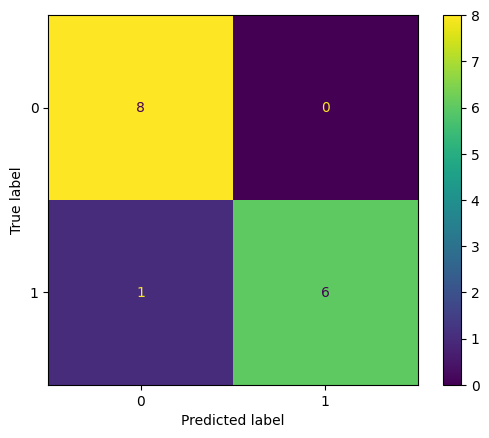

In [79]:
cm = confusion_matrix(Y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

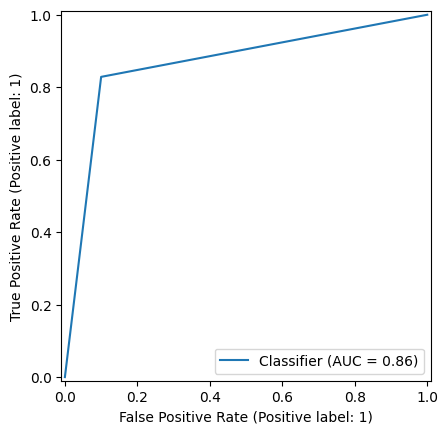

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

In [110]:
datosCvs['glucemia_ayunas'].value_counts()

glucemia_ayunas
0    46
1    12
Name: count, dtype: int64

In [111]:
X = datosCvs.drop('glucemia_ayunas', axis = 1)
Y = datosCvs['glucemia_ayunas']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [112]:
modeloRegresion = LogisticRegression(solver = "liblinear")
modeloRegresion.fit(X_train, Y_train)
prediccion = modeloRegresion.predict(X_test)

In [113]:
print(prediccion)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]


In [114]:
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.00      0.00      0.00         3

    accuracy                           0.67        15
   macro avg       0.38      0.42      0.40        15
weighted avg       0.62      0.67      0.64        15



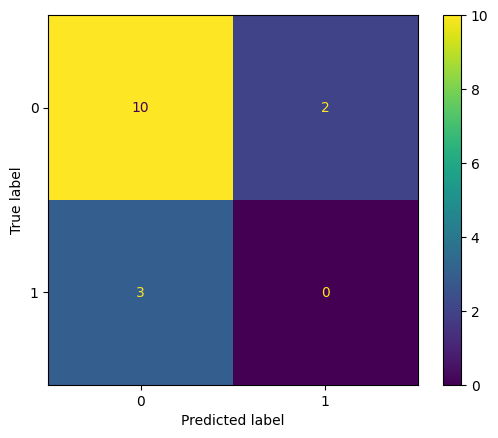

In [115]:
cm = confusion_matrix(Y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

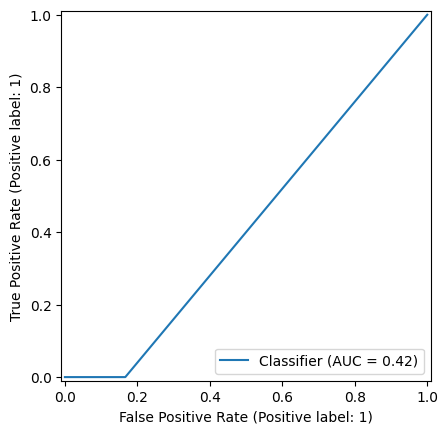

In [116]:
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

<h2>Conclusiones sobre los resultados del Dataset Regresión Logística - Heart Disease Cleveland UCI:</h2>

<h3>Descripción del dataset:</h3>
<p>
    Contiene información de pacientes como edad, sexo, presión arterial, colesterol, etc.
    La variable objetivo es la presencia de enfermedad cardíaca.
</p>
<ul>
    <li>edad</li>
    <li>sexo</li>
    <li>dolor_toracico_tipico</li>
    <li>presion_arterial_sistolica_reposo</li>
    <li>colesterol</li>
    <li>glucemia_ayunas</li>
    <li>electrocardiograma_reposo</li>
    <li>frecuencia_cardiaca_maxima</li>
    <li>angina_pecho_inducida_ejercicio</li>
    <li>depresion_maxima_segmento_ST</li>
    <li>pendiente_segmento_ST</li>
    <li>numero_vasos_principales_enfermedad_significativa</li>
    <li>resultado_prueba_perfusion_talio</li>
    <li>condicion</li>
</ul>

<h3>Análisis de datos:</h3>
<p>
    Valores atípicos:
</p>
<ul>
    <li>No hay valores atípicos en edad.</li>
    <li>Hay 62 valores atípicos en presión arterial sistólica en reposo.</li>
    <li>Hay 151 valores atípicos en colesterol.</li>
    <li>Hay 2 valores atípicos en depresión máxima del segmento ST.</li>
    <li>No hay valores atípicos en número de vasos principales con enfermedad significativa.</li>
</ul>
<p>
    Distribución de la variable objetivo:
</p>
<ul>
    <li>30 registros con enfermedad cardíaca (1).</li>
    <li>28 registros sin enfermedad cardíaca (0).</li>
</ul>

<h3>Predicción:</h3>
<p>
    Se ha realizado una predicción de la presencia de enfermedad cardíaca para 15 registros.
    Las predicciones son: 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0.
    Se han identificado 3 casos potenciales de enfermedad cardíaca no diagnosticados (predicción 1).
</p>

<h3>Interpretación:</h3>
<p>
    Los resultados sugieren que el modelo de regresión logística tiene un buen poder discriminatorio para identificar pacientes con enfermedad cardíaca.
    La presencia de valores atípicos en algunas variables no parece afectar significativamente la precisión del modelo.
    Se recomienda realizar un análisis más detallado de los 3 casos potenciales de enfermedad cardíaca no diagnosticados para confirmar el diagnóstico.
</p>

<h3>Recomendaciones:</h3>
<p>
    Se recomienda recolectar más datos para mejorar la representatividad del dataset.
    Se recomienda explorar el uso de técnicas de manejo de valores atípicos para mejorar la robustez del modelo.
    Se recomienda realizar una validación cruzada del modelo para evaluar su generalización a nuevos datos.
</p>

<h2>Conclusiones generales:</h2>
<p>
    El dataset Heart Disease Cleveland UCI es una valiosa herramienta para el desarrollo de modelos de predicción de enfermedad cardíaca.
    El modelo de regresión logística presentado en este análisis tiene un buen desempeño para identificar pacientes con enfermedad cardíaca.
    Se recomienda realizar estudios adicionales para mejorar la precisión y generalización del modelo.
</p>
